**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from nltk.tokenize import wordpunct_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

**Loading Datasets**

In [2]:
df_train=pd.read_csv("D:\Edureka Machine Learning\Consumer_Complaints_train.csv")
df_test=pd.read_csv("D:\Edureka Machine Learning\Consumer_Complaints_test.csv")

In [3]:
df_train.head()

,Datereceived,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,14-10-2015,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,Equifax,GA,30134,NaN,Consent not provided,Web,14-10-2015,Closed with explanation,Yes,No,1605653
1,26-04-2015,Bank account or service,Other bank product/service,Deposits and withdrawals,NaN,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...,NaN,Wells Fargo & Company,GA,319XX,NaN,Consent provided,Web,26-04-2015,Closed with explanation,Yes,Yes,1347613
2,20-12-2013,Credit card,NaN,Other,NaN,NaN,NaN,Citibank,SC,29203,NaN,NaN,Phone,03-01-2014,Closed with non-monetary relief,Yes,No,640394
3,03-03-2016,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,NaN,Company has responded to the consumer and the ...,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,NaN,NaN,Referral,04-03-2016,Closed with explanation,Yes,No,1815134
4,30-01-2015,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"HCFS Health Care Financial Services, Inc.",CA,90036,NaN,NaN,Web,30-01-2015,Closed with explanation,Yes,Yes,1218613


In [4]:
df_test.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,2015-01-17,Credit card,NaN,Customer service / Customer relations,NaN,NaN,NaN,Citibank,TX,75241,NaN,NaN,Web,2015-01-17,Closed with monetary relief,Yes,1198133
1,2016-06-22,Consumer Loan,Title loan,Payment to acct not credited,NaN,NaN,Company believes it acted appropriately as aut...,"Larsen MacColl Partners II, L.P.",TX,76548,Servicemember,NaN,Phone,2016-06-22,Closed with explanation,Yes,1979989
2,2015-09-04,Credit card,NaN,Credit line increase/decrease,NaN,I WANT TO REQUEST A CREDIT LINE INCREASE OF XX...,NaN,Capital One,NC,271XX,NaN,Consent provided,Web,2015-09-04,Closed with explanation,Yes,1552090
3,2016-05-17,Consumer Loan,Installment loan,Problems when you are unable to pay,NaN,I have asked One Main Financial not to call my...,NaN,"OneMain Financial Holdings, LLC",MO,634XX,NaN,Consent provided,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306
4,2016-07-07,Debt collection,"Other (i.e. phone, health club, etc.)",Improper contact or sharing of info,Contacted employer after asked not to,I have received several calls from a XXXX XXXX...,Company has responded to the consumer and the ...,"GMA Investments, LLC",SC,296XX,NaN,Consent provided,Web,2016-07-07,Closed with explanation,Yes,2001667


In [5]:
print("The shape of train data set is:", df_train.shape)
print("The shape of test data set is:", df_test.shape)

The shape of train data set is: (358810, 18)
The shape of test data set is: (119606, 17)


**Data Preprocessing**

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358810 entries, 0 to 358809
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Datereceived                  358810 non-null  object
 1   Product                       358810 non-null  object
 2   Sub-product                   255024 non-null  object
 3   Issue                         358810 non-null  object
 4   Sub-issue                     139436 non-null  object
 5   Consumer complaint narrative  56180 non-null   object
 6   Company public response       67931 non-null   object
 7   Company                       358810 non-null  object
 8   State                         355907 non-null  object
 9   ZIP code                      355899 non-null  object
 10  Tags                          50226 non-null   object
 11  Consumer consent provided?    101580 non-null  object
 12  Submitted via                 358810 non-null  object
 13 

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119606 entries, 0 to 119605
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 119606 non-null  object
 1   Product                       119606 non-null  object
 2   Sub-product                   84923 non-null   object
 3   Issue                         119606 non-null  object
 4   Sub-issue                     46356 non-null   object
 5   Consumer complaint narrative  18914 non-null   object
 6   Company public response       22460 non-null   object
 7   Company                       119606 non-null  object
 8   State                         118670 non-null  object
 9   ZIP code                      118669 non-null  object
 10  Tags                          16977 non-null   object
 11  Consumer consent provided?    33907 non-null   object
 12  Submitted via                 119606 non-null  object
 13 

In [8]:
df_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358810 entries, 0 to 358809
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Datereceived                  358810 non-null  object
 1   Product                       358810 non-null  object
 2   Sub-product                   255024 non-null  object
 3   Issue                         358810 non-null  object
 4   Sub-issue                     139436 non-null  object
 5   Consumer complaint narrative  56180 non-null   object
 6   Company public response       67931 non-null   object
 7   Company                       358810 non-null  object
 8   State                         355907 non-null  object
 9   ZIP code                      355899 non-null  object
 10  Tags                          50226 non-null   object
 11  Consumer consent provided?    101580 non-null  object
 12  Submitted via                 358810 non-null  object
 13 

In [9]:
df_test.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119606 entries, 0 to 119605
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 119606 non-null  object
 1   Product                       119606 non-null  object
 2   Sub-product                   84923 non-null   object
 3   Issue                         119606 non-null  object
 4   Sub-issue                     46356 non-null   object
 5   Consumer complaint narrative  18914 non-null   object
 6   Company public response       22460 non-null   object
 7   Company                       119606 non-null  object
 8   State                         118670 non-null  object
 9   ZIP code                      118669 non-null  object
 10  Tags                          16977 non-null   object
 11  Consumer consent provided?    33907 non-null   object
 12  Submitted via                 119606 non-null  object
 13 

In [10]:
print("The null values in each columns of train data set is:\n", df_train.isnull().sum())

The null values in each columns of train data set is:
 Datereceived                         0
Product                              0
Sub-product                     103786
Issue                                0
Sub-issue                       219374
Consumer complaint narrative    302630
Company public response         290879
Company                              0
State                             2903
ZIP code                          2911
Tags                            308584
Consumer consent provided?      257230
Submitted via                        0
Date sent to company                 0
Company response to consumer         0
Timely response?                     0
Consumer disputed?                   0
Complaint ID                         0
dtype: int64


In [11]:
print("The null values in each columns if test data set is:\n", df_test.isnull().sum())

The null values in each columns if test data set is:
 Date received                        0
Product                              0
Sub-product                      34683
Issue                                0
Sub-issue                        73250
Consumer complaint narrative    100692
Company public response          97146
Company                              0
State                              936
ZIP code                           937
Tags                            102629
Consumer consent provided?       85699
Submitted via                        0
Date sent to company                 0
Company response to consumer         0
Timely response?                     0
Complaint ID                         0
dtype: int64


In [12]:
percentage_of_null_values_train={}
for column in list(df_train.columns):
    percentage_of_null_values_train[column]=df_train[column].isnull().sum()*100/358810
Train_null_value_percentage=pd.DataFrame((percentage_of_null_values_train), index=(['percentage']))
print("missing values in train dataset from train dataset\n", Train_null_value_percentage.T.sort_values(by='percentage', ascending=False))

missing values in train dataset from train dataset
                               percentage
Tags                           86.002062
Consumer complaint narrative   84.342688
Company public response        81.067696
Consumer consent provided?     71.689752
Sub-issue                      61.139322
Sub-product                    28.925058
ZIP code                        0.811293
State                           0.809063
Date sent to company            0.000000
Consumer disputed?              0.000000
Timely response?                0.000000
Company response to consumer    0.000000
Datereceived                    0.000000
Submitted via                   0.000000
Product                         0.000000
Company                         0.000000
Issue                           0.000000
Complaint ID                    0.000000


In [13]:
percentage_of_null_values_test={}
for column in list(df_test.columns):
    percentage_of_null_values_test[column]=df_test[column].isnull().sum()*100/119606
Test_null_value_percentage=pd.DataFrame((percentage_of_null_values_test), index=(['percentage']))
print("missing valus in percentage from test dataset is\n", Test_null_value_percentage.T.sort_values(by='percentage', ascending=False))

missing valus in percentage from test dataset is
                               percentage
Tags                           85.805896
Consumer complaint narrative   84.186412
Company public response        81.221678
Consumer consent provided?     71.651088
Sub-issue                      61.242747
Sub-product                    28.997709
ZIP code                        0.783406
State                           0.782569
Submitted via                   0.000000
Timely response?                0.000000
Company response to consumer    0.000000
Date sent to company            0.000000
Date received                   0.000000
Product                         0.000000
Company                         0.000000
Issue                           0.000000
Complaint ID                    0.000000


In [14]:
for column in list(df_train.columns):
    if df_train[column].isnull().sum()>(0.25*358810):
        df_train.drop(columns=column, axis=1, inplace=True)
    else:
        continue

In [15]:
df_train.shape
df_train.head(5)

,Datereceived,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,14-10-2015,Credit reporting,Incorrect information on credit report,Equifax,GA,30134,Web,14-10-2015,Closed with explanation,Yes,No,1605653
1,26-04-2015,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,319XX,Web,26-04-2015,Closed with explanation,Yes,Yes,1347613
2,20-12-2013,Credit card,Other,Citibank,SC,29203,Phone,03-01-2014,Closed with non-monetary relief,Yes,No,640394
3,03-03-2016,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,Referral,04-03-2016,Closed with explanation,Yes,No,1815134
4,30-01-2015,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,90036,Web,30-01-2015,Closed with explanation,Yes,Yes,1218613


In [16]:
for column in list(df_test.columns):
    if df_test[column].isnull().sum()>(0.25*119606):
        df_test.drop(columns=column, axis=1, inplace=True)
    else:
        continue

In [17]:
df_test.shape
df_test.head(5)

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,2015-01-17,Credit card,Customer service / Customer relations,Citibank,TX,75241,Web,2015-01-17,Closed with monetary relief,Yes,1198133
1,2016-06-22,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,76548,Phone,2016-06-22,Closed with explanation,Yes,1979989
2,2015-09-04,Credit card,Credit line increase/decrease,Capital One,NC,271XX,Web,2015-09-04,Closed with explanation,Yes,1552090
3,2016-05-17,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,634XX,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306
4,2016-07-07,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,296XX,Web,2016-07-07,Closed with explanation,Yes,2001667


In [18]:
df_train['Datereceived']=pd.to_datetime(df_train['Datereceived'], dayfirst=True)
df_train['Date sent to company']=pd.to_datetime(df_train['Date sent to company'], dayfirst=True)

In [19]:
print(df_train.dtypes)

Datereceived                    datetime64[ns]
Product                                 object
Issue                                   object
Company                                 object
State                                   object
ZIP code                                object
Submitted via                           object
Date sent to company            datetime64[ns]
Company response to consumer            object
Timely response?                        object
Consumer disputed?                      object
Complaint ID                             int64
dtype: object


In [20]:
df_test['Date received']=pd.to_datetime(df_test['Date received'])
df_test['Date sent to company']=pd.to_datetime(df_test['Date sent to company'])

In [21]:
print(df_test.dtypes)

Date received                   datetime64[ns]
Product                                 object
Issue                                   object
Company                                 object
State                                   object
ZIP code                                object
Submitted via                           object
Date sent to company            datetime64[ns]
Company response to consumer            object
Timely response?                        object
Complaint ID                             int64
dtype: object


In [22]:
df_train['Year received']=df_train['Datereceived'].dt.year
df_train['Month']=df_train['Datereceived'].dt.month
df_train['day']=df_train['Datereceived'].dt.day

In [23]:
df_test['Year received']=df_test['Date received'].dt.year
df_test['Month']=df_test['Date received'].dt.month
df_test['day']=df_test['Date received'].dt.day

In [24]:
df_train.head()

,Datereceived,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Year received,Month,day
0,2015-10-14,Credit reporting,Incorrect information on credit report,Equifax,GA,30134,Web,2015-10-14,Closed with explanation,Yes,No,1605653,2015,10,14
1,2015-04-26,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,319XX,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613,2015,4,26
2,2013-12-20,Credit card,Other,Citibank,SC,29203,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394,2013,12,20
3,2016-03-03,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,Referral,2016-03-04,Closed with explanation,Yes,No,1815134,2016,3,3
4,2015-01-30,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,90036,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613,2015,1,30


In [25]:
df_test.head(5)

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID,Year received,Month,day
0,2015-01-17,Credit card,Customer service / Customer relations,Citibank,TX,75241,Web,2015-01-17,Closed with monetary relief,Yes,1198133,2015,1,17
1,2016-06-22,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,76548,Phone,2016-06-22,Closed with explanation,Yes,1979989,2016,6,22
2,2015-09-04,Credit card,Credit line increase/decrease,Capital One,NC,271XX,Web,2015-09-04,Closed with explanation,Yes,1552090,2015,9,4
3,2016-05-17,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,634XX,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306,2016,5,17
4,2016-07-07,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,296XX,Web,2016-07-07,Closed with explanation,Yes,2001667,2016,7,7


In [26]:
df_train['days held']=df_train['Date sent to company']-df_train['Datereceived']
df_test['days held']=df_test['Date sent to company']-df_test['Date received']

In [27]:
df_train.head(5)

,Datereceived,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Year received,Month,day,days held
0,2015-10-14,Credit reporting,Incorrect information on credit report,Equifax,GA,30134,Web,2015-10-14,Closed with explanation,Yes,No,1605653,2015,10,14,0 days
1,2015-04-26,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,319XX,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613,2015,4,26,0 days
2,2013-12-20,Credit card,Other,Citibank,SC,29203,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394,2013,12,20,14 days
3,2016-03-03,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,Referral,2016-03-04,Closed with explanation,Yes,No,1815134,2016,3,3,1 days
4,2015-01-30,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,90036,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613,2015,1,30,0 days


In [28]:
df_test.head(5)

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID,Year received,Month,day,days held
0,2015-01-17,Credit card,Customer service / Customer relations,Citibank,TX,75241,Web,2015-01-17,Closed with monetary relief,Yes,1198133,2015,1,17,0 days
1,2016-06-22,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,76548,Phone,2016-06-22,Closed with explanation,Yes,1979989,2016,6,22,0 days
2,2015-09-04,Credit card,Credit line increase/decrease,Capital One,NC,271XX,Web,2015-09-04,Closed with explanation,Yes,1552090,2015,9,4,0 days
3,2016-05-17,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,634XX,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306,2016,5,17,3 days
4,2016-07-07,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,296XX,Web,2016-07-07,Closed with explanation,Yes,2001667,2016,7,7,0 days


In [29]:
df_train.drop(columns=['Datereceived','Date sent to company','ZIP code','Complaint ID'], axis=1, inplace=True)

In [30]:
df_test.drop(columns=['Date received','Date sent to company','ZIP code','Complaint ID'], axis=1, inplace=True)

In [31]:
df_train.head(5)

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Year received,Month,day,days held
0,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,No,2015,10,14,0 days
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,2015,4,26,0 days
2,Credit card,Other,Citibank,SC,Phone,Closed with non-monetary relief,Yes,No,2013,12,20,14 days
3,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,Referral,Closed with explanation,Yes,No,2016,3,3,1 days
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,2015,1,30,0 days


In [32]:
df_test.head(5)

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Year received,Month,day,days held
0,Credit card,Customer service / Customer relations,Citibank,TX,Web,Closed with monetary relief,Yes,2015,1,17,0 days
1,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,Phone,Closed with explanation,Yes,2016,6,22,0 days
2,Credit card,Credit line increase/decrease,Capital One,NC,Web,Closed with explanation,Yes,2015,9,4,0 days
3,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,Web,Closed with non-monetary relief,Yes,2016,5,17,3 days
4,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,Web,Closed with explanation,Yes,2016,7,7,0 days


In [33]:
df_train.fillna(df_train.mode().iloc[0], inplace=True)

In [34]:
df_train.isnull().sum()

Product                         0
Issue                           0
Company                         0
State                           0
Submitted via                   0
Company response to consumer    0
Timely response?                0
Consumer disputed?              0
Year received                   0
Month                           0
day                             0
days held                       0
dtype: int64

In [35]:
df_test.fillna(df_train.mode().iloc[0], inplace=True)

In [36]:
df_test.isnull().sum()

Product                         0
Issue                           0
Company                         0
State                           0
Submitted via                   0
Company response to consumer    0
Timely response?                0
Year received                   0
Month                           0
day                             0
days held                       0
dtype: int64

In [37]:
df_train.head()

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Year received,Month,day,days held
0,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,No,2015,10,14,0 days
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,2015,4,26,0 days
2,Credit card,Other,Citibank,SC,Phone,Closed with non-monetary relief,Yes,No,2013,12,20,14 days
3,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,Referral,Closed with explanation,Yes,No,2016,3,3,1 days
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,2015,1,30,0 days


In [38]:
disputed_cons=df_train[df_train['Consumer disputed?']=='Yes']
print(pd.DataFrame(disputed_cons))

                        Product                                     Issue  \
1       Bank account or service                  Deposits and withdrawals   
4               Debt collection           Disclosure verification of debt   
5                   Credit card                      APR or interest rate   
7                   Credit card                            Payoff process   
8       Bank account or service                  Deposits and withdrawals   
...                         ...                                       ...   
358787                 Mortgage            Credit decision / Underwriting   
358791                 Mortgage  Loan modification,collection,foreclosure   
358797          Debt collection     Cont'd attempts collect debt not owed   
358798         Credit reporting    Incorrect information on credit report   
358807              Credit card                            Payoff process   

                                          Company State Submitted via  \
1 

In [39]:
disputed_cons.head()

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Year received,Month,day,days held
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,2015,4,26,0 days
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,2015,1,30,0 days
5,Credit card,APR or interest rate,TD Bank US Holding Company,FL,Web,Closed with explanation,Yes,Yes,2014,1,10,5 days
7,Credit card,Payoff process,Capital One,IL,Web,Closed with explanation,Yes,Yes,2015,12,7,0 days
8,Bank account or service,Deposits and withdrawals,"Citizens Financial Group, Inc.",PA,Web,Closed with relief,Yes,Yes,2012,4,5,0 days


In [40]:
disputed = df_train['Consumer disputed?'].value_counts()
company_response = df_train['Company response to consumer'].value_counts()
product_distribution=df_train['Product'].value_counts()
print(disputed)
print("===========================================================================================================")
print(company_response)
print("===========================================================================================================")
print(product_distribution)

Consumer disputed?
No     282638
Yes     76172
Name: count, dtype: int64
Company response to consumer
Closed with explanation            265700
Closed with non-monetary relief     46085
Closed with monetary relief         24715
Closed without relief               10604
Closed                               8568
Closed with relief                   3138
Name: count, dtype: int64
Product
Mortgage                   117066
Debt collection             65033
Credit reporting            60672
Credit card                 43114
Bank account or service     40667
Consumer Loan               13964
Student loan                11306
Money transfers              2502
Payday loan                  2425
Prepaid card                 1671
Other financial service       385
Virtual currency                5
Name: count, dtype: int64


In [41]:
df_train.dtypes

Product                                  object
Issue                                    object
Company                                  object
State                                    object
Submitted via                            object
Company response to consumer             object
Timely response?                         object
Consumer disputed?                       object
Year received                             int32
Month                                     int32
day                                       int32
days held                       timedelta64[ns]
dtype: object

**Data Visualisation**

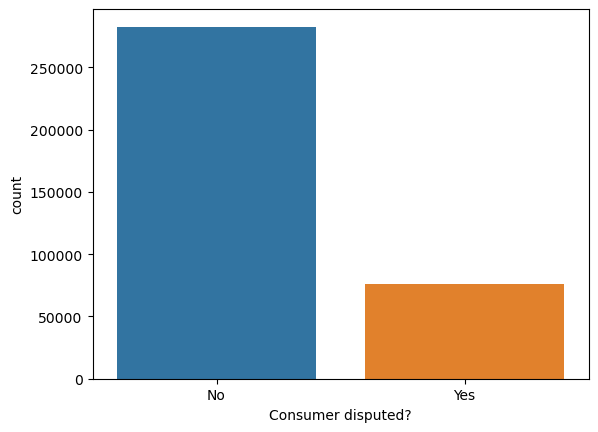

In [42]:
sns.countplot(x='Consumer disputed?' , data=df_train)
plt.show()

In [43]:
df_counts = df_train.groupby(['Product', 'Consumer disputed?']).size().reset_index(name='Count')

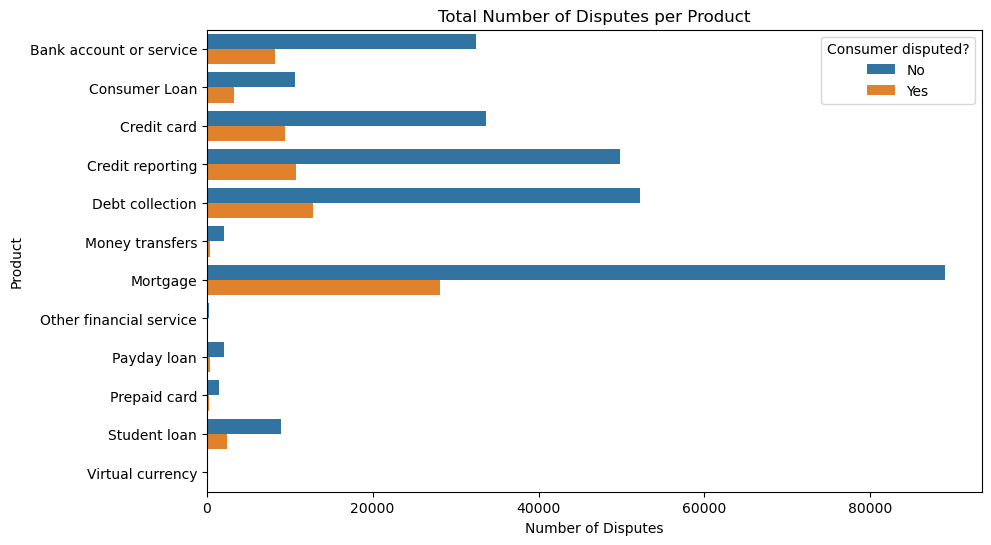

In [44]:
# Plotting the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(y='Product', x='Count', hue='Consumer disputed?', data=df_counts)
plt.title('Total Number of Disputes per Product')
plt.ylabel('Product')
plt.xlabel('Number of Disputes')
plt.show()

In [45]:
df_issues = df_train.groupby(['Issue', 'Consumer disputed?']).size().reset_index(name='Count')

# Pivot the DataFrame to have 'Yes' and 'No' counts in separate columns
df_pivot = df_issues.pivot(index='Issue', columns='Consumer disputed?', values='Count').fillna(0).reset_index()

# Calculate the total number of disputes for sorting
df_pivot['Total'] = df_pivot['Yes'] + df_pivot['No']

# Sorting the DataFrame by 'Total' disputes and then by 'Yes' disputes
df_pivot = df_pivot.sort_values(by=['Total', 'Yes'], ascending=[False, False])

# Select the top 10 issues
df_top20 = df_pivot.head(20)

# Melt the DataFrame back to long form for plotting
df_melted = df_top20.melt(id_vars='Issue', value_vars=['Yes', 'No'], var_name='Consumer disputed?', value_name='Count')

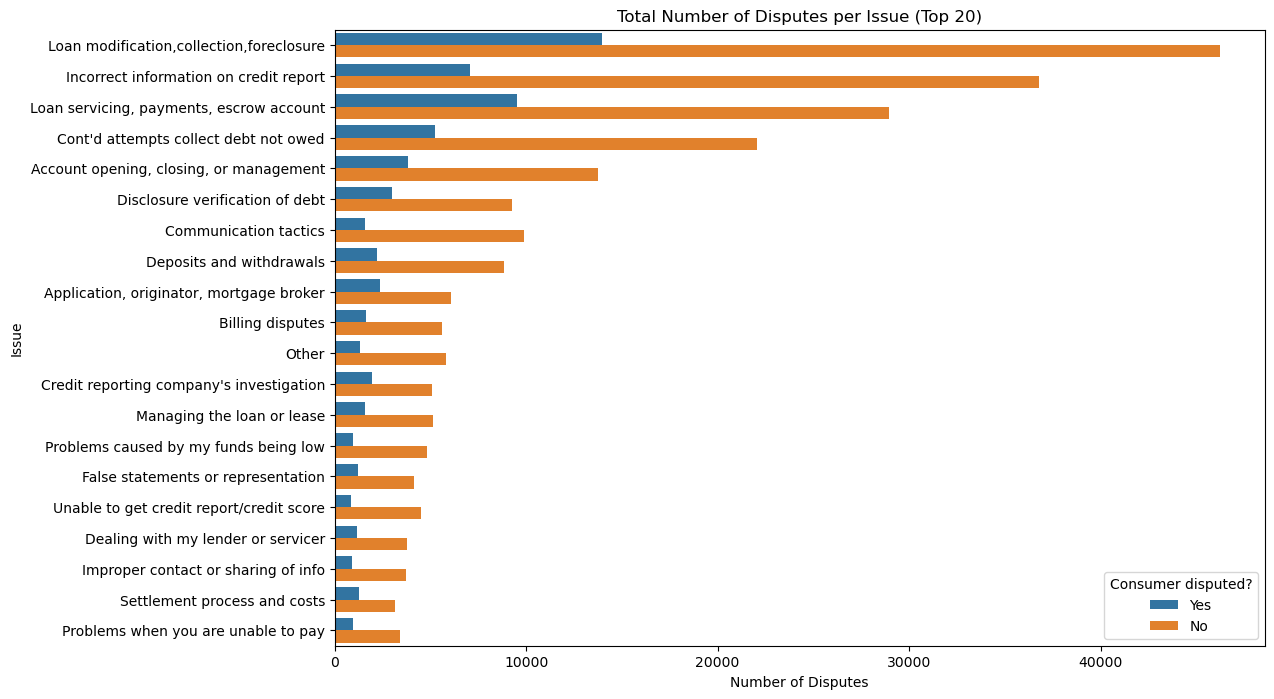

In [46]:
# Plotting the bar graph
plt.figure(figsize=(12, 8))
sns.barplot(y='Issue', x='Count', hue='Consumer disputed?', data=df_melted, order=df_top20['Issue'])
plt.title('Total Number of Disputes per Issue (Top 20)')
plt.ylabel('Issue')
plt.xlabel('Number of Disputes')
plt.show()

In [47]:
df_states = df_train.groupby(['State', 'Consumer disputed?']).size().reset_index(name='Count')

# Pivot the DataFrame to have 'Yes' and 'No' counts in separate columns
df_pivot = df_states.pivot(index='State', columns='Consumer disputed?', values='Count')

# Calculate the total number of disputes for sorting
df_pivot['Total'] = df_pivot['Yes'] + df_pivot['No']

In [48]:
df_pivot.drop(columns=['Yes','No'], axis=1, inplace=True)

In [49]:
df_pivot=df_pivot.sort_values(by='Total', ascending=False)

In [50]:
df_pivot.index

Index(['CA', 'FL', 'TX', 'NY', 'GA', 'NJ', 'PA', 'IL', 'VA', 'MD', 'OH', 'NC',
       'MI', 'AZ', 'WA', 'MA', 'CO', 'TN', 'MO', 'SC', 'NV', 'OR', 'CT', 'MN',
       'IN', 'WI', 'AL', 'LA', 'KY', 'OK', 'DC', 'UT', 'DE', 'NM', 'NH', 'KS',
       'MS', 'AR', 'IA', 'RI', 'ID', 'HI', 'ME', 'NE', 'WV', 'PR', 'VT', 'MT',
       'SD', 'AK', 'WY', 'ND', 'AE', 'AP', 'VI', 'GU', 'FM', 'MH', 'MP', 'AS',
       'PW', 'AA'],
      dtype='object', name='State')

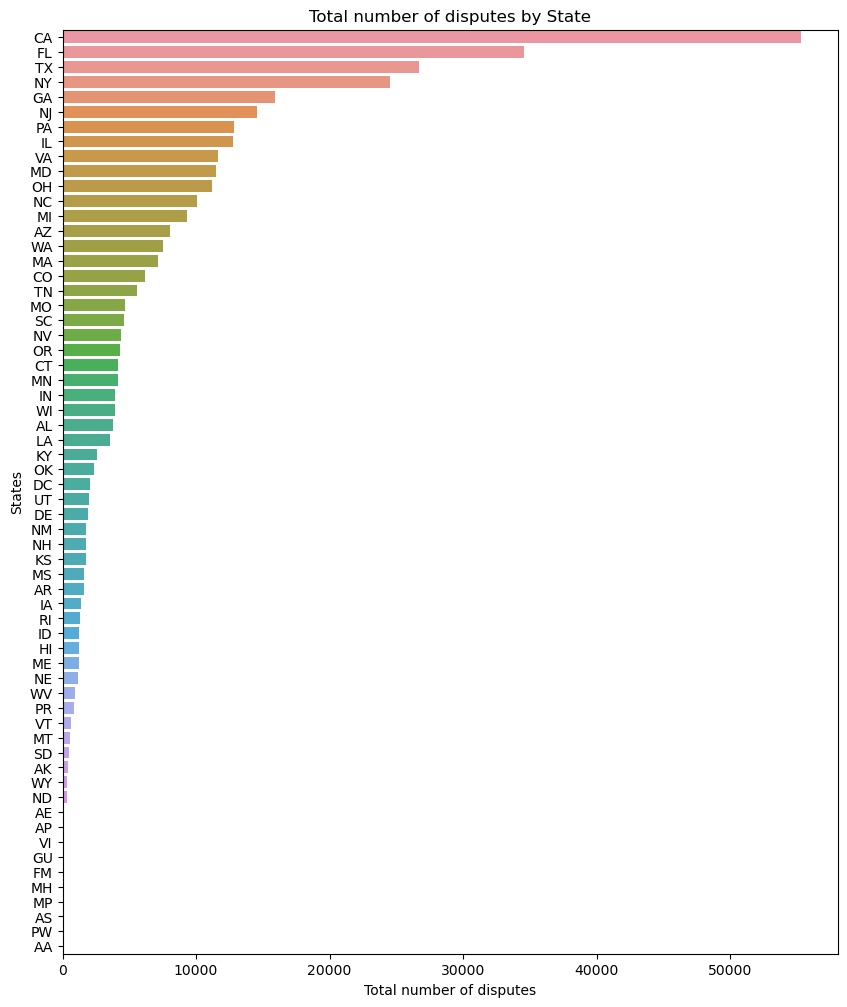

In [51]:
plt.figure(figsize=(10,12))
sns.barplot(y=df_pivot.index, x='Total', data=df_pivot)
plt.title('Total number of disputes by State')
plt.xlabel('Total number of disputes')
plt.ylabel('States')
plt.show()

In [52]:
df_train['Submitted via'].value_counts()

Submitted via
Web            235462
Referral        68450
Phone           25802
Postal mail     23644
Fax              5264
Email             188
Name: count, dtype: int64

In [53]:
df_submition = df_train.groupby(['Submitted via', 'Consumer disputed?']).size().reset_index(name='Count')

df_pivot = df_submition.pivot(index='Submitted via', columns='Consumer disputed?', values='Count').reset_index()

df_pivot['Total'] = df_pivot['Yes'] + df_pivot['No']

df_pivot=df_pivot.sort_values(by=['Yes','No','Total'], ascending=[False,False,False])

df_melted=df_pivot.melt(id_vars='Submitted via', value_vars=['Yes','No','Total'], var_name='Consumer disputed?', value_name='Count')

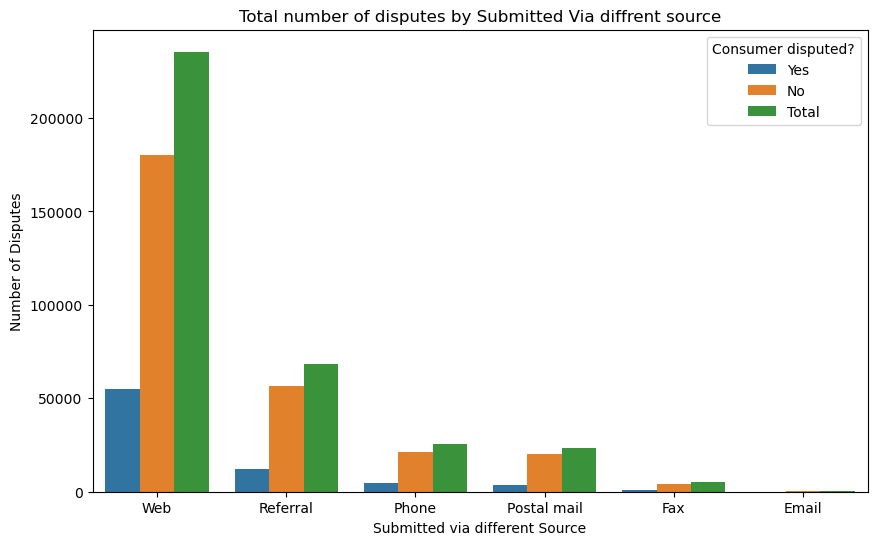

In [54]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Submitted via', y='Count', hue='Consumer disputed?', data=df_melted)
plt.title('Total number of disputes by Submitted Via diffrent source')
plt.xlabel('Submitted via different Source')
plt.ylabel('Number of Disputes')
plt.show()

In [55]:
df_response = df_train.groupby(['Company response to consumer', 'Consumer disputed?']).size().reset_index(name='Count')

df_pivot = df_response.pivot(index='Company response to consumer', columns='Consumer disputed?', values='Count').reset_index()

df_pivot['Total'] = df_pivot['Yes'] + df_pivot['No']

df_pivot=df_pivot.sort_values(by=['Yes','No','Total'], ascending=[False,False,False])

df_melted=df_pivot.melt(id_vars='Company response to consumer', value_vars=['Yes','No','Total'], var_name='Consumer disputed?', value_name='Count')

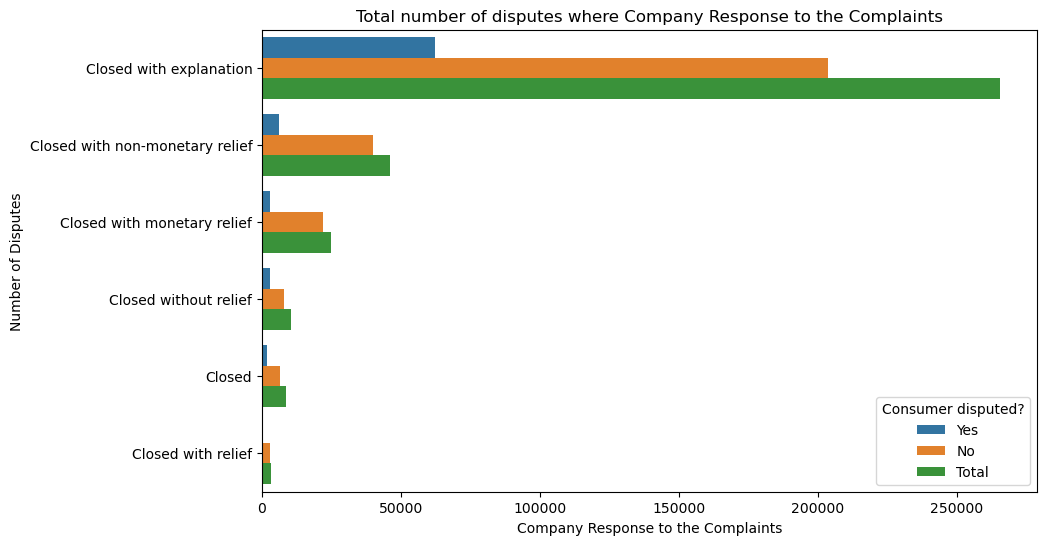

In [56]:
plt.figure(figsize=(10, 6))
sns.barplot(y='Company response to consumer', x='Count', hue='Consumer disputed?', data=df_melted)
plt.title('Total number of disputes where Company Response to the Complaints')
plt.xlabel('Company Response to the Complaints')
plt.ylabel('Number of Disputes')
plt.show()

In [57]:
df_timely_response = df_train.groupby(['Timely response?', 'Consumer disputed?']).size().reset_index(name='Count')

df_pivot = df_timely_response.pivot(index='Timely response?', columns='Consumer disputed?', values='Count').reset_index()

df_pivot['Total'] = df_pivot['Yes'] + df_pivot['No']

df_pivot=df_pivot.sort_values(by=['Yes','No','Total'], ascending=[False,False,False])

df_melted=df_pivot.melt(id_vars='Timely response?', value_vars=['Yes','No','Total'], var_name='Consumer disputed?', value_name='Count')

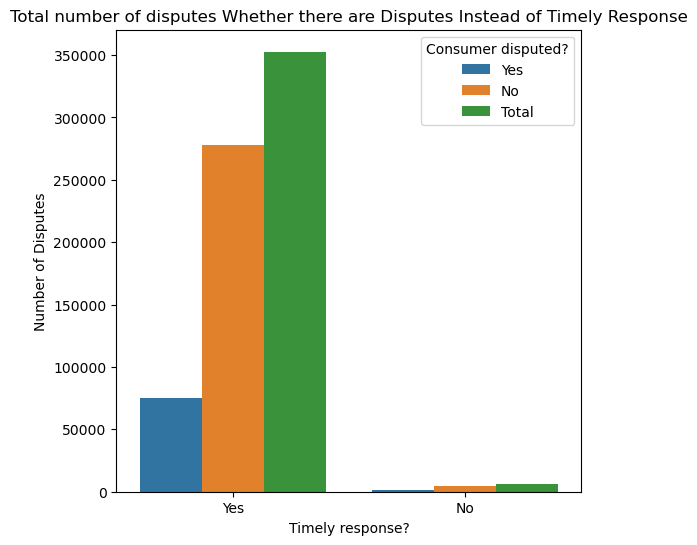

In [58]:
plt.figure(figsize=(6,6))
sns.barplot(x='Timely response?', y='Count', hue='Consumer disputed?', data=df_melted)
plt.title('Total number of disputes Whether there are Disputes Instead of Timely Response')
plt.xlabel('Timely response?')
plt.ylabel('Number of Disputes')
plt.show()

In [59]:
df_year = df_train.groupby(['Year received', 'Consumer disputed?']).size().reset_index(name='Count')

df_pivot = df_year.pivot(index='Year received', columns='Consumer disputed?', values='Count').reset_index()

df_pivot['Total'] = df_pivot['Yes'] + df_pivot['No']

df_pivot=df_pivot.sort_values(by=['Yes','No','Total'], ascending=[False,False,False])

df_melted=df_pivot.melt(id_vars='Year received', value_vars=['Yes','No','Total'], var_name='Consumer disputed?', value_name='Count')

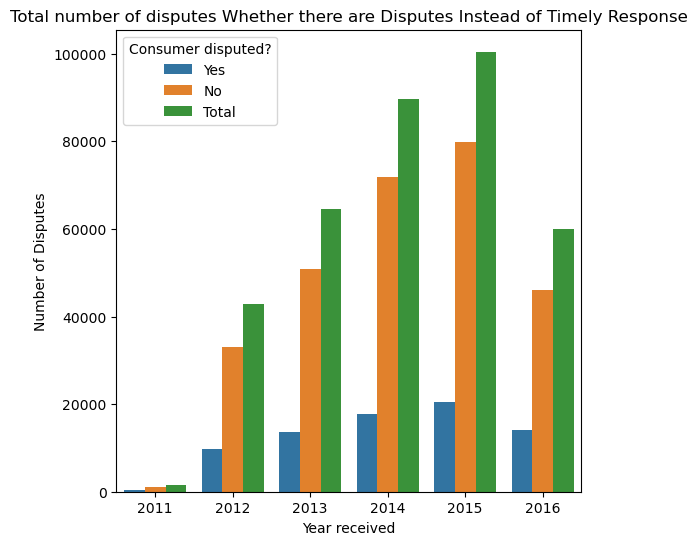

In [60]:
plt.figure(figsize=(6,6))
sns.barplot(x='Year received', y='Count', hue='Consumer disputed?', data=df_melted)
plt.title('Total number of disputes Whether there are Disputes Instead of Timely Response')
plt.xlabel('Year received')
plt.ylabel('Number of Disputes')
plt.show()

In [61]:
df_company = df_train.groupby(['Company', 'Consumer disputed?']).size().reset_index(name='Count')

df_pivot = df_company.pivot(index='Company', columns='Consumer disputed?', values='Count').fillna(0).reset_index()

# Calculate the total number of disputes for sorting
df_pivot['Total'] = df_pivot['Yes'] + df_pivot['No']

# Sorting the DataFrame by 'Total' disputes and then by 'Yes' disputes
df_pivot = df_pivot.sort_values(by=['Total', 'Yes', 'No'], ascending=[False, False, False])

# Select the top 10 issues
df_top20 = df_pivot.head(20)

# Melt the DataFrame back to long form for plotting
df_melted = df_top20.melt(id_vars='Company', value_vars=['Yes', 'No', 'Total'], var_name='Consumer disputed?', value_name='Count')

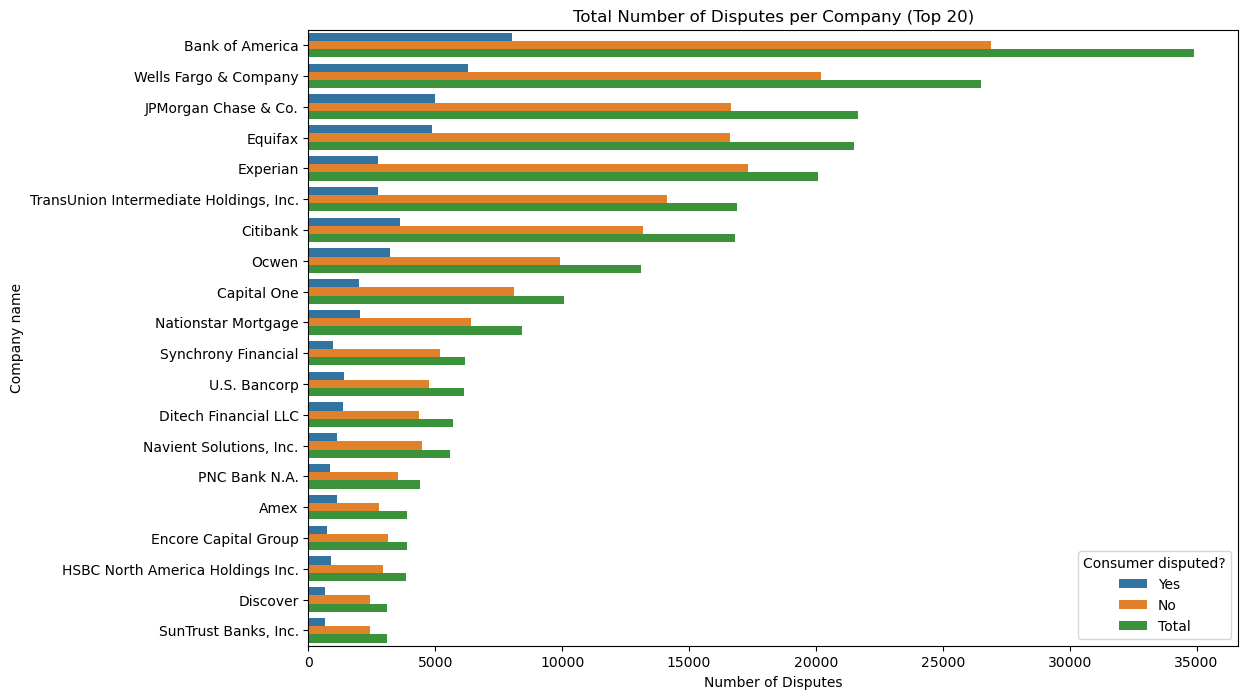

In [62]:
plt.figure(figsize=(12, 8))
sns.barplot(y='Company', x='Count', hue='Consumer disputed?', data=df_melted, order=df_top20['Company'])
plt.title('Total Number of Disputes per Company (Top 20)')
plt.ylabel('Company name')
plt.xlabel('Number of Disputes')
plt.show()

In [63]:
df_train.describe()

,Year received,Month,day,days held
count,358810.000000,358810.000000,358810.000000,358810
mean,2014.183629,6.151858,15.701759,4 days 10:57:07.690421114
std,1.268063,3.356024,8.708241,16 days 17:48:00.827311545
min,2011.000000,1.000000,1.000000,-1 days +00:00:00
25%,2013.000000,3.000000,8.000000,0 days 00:00:00
50%,2014.000000,6.000000,16.000000,1 days 00:00:00
75%,2015.000000,9.000000,23.000000,4 days 00:00:00
max,2016.000000,12.000000,31.000000,993 days 00:00:00


In [64]:
df_train

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Year received,Month,day,days held
0,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,No,2015,10,14,0 days
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,2015,4,26,0 days
2,Credit card,Other,Citibank,SC,Phone,Closed with non-monetary relief,Yes,No,2013,12,20,14 days
3,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,Referral,Closed with explanation,Yes,No,2016,3,3,1 days
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,2015,1,30,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...
358805,Credit reporting,Incorrect information on credit report,Experian,OR,Web,Closed with non-monetary relief,Yes,No,2014,4,14,-1 days
358806,Mortgage,"Loan modification,collection,foreclosure",Citibank,OH,Referral,Closed with non-monetary relief,Yes,No,2013,3,14,4 days
358807,Credit card,Payoff process,Capital One,TX,Web,Closed,Yes,Yes,2013,2,1,0 days
358808,Debt collection,Cont'd attempts collect debt not owed,Encore Capital Group,FL,Phone,Closed with non-monetary relief,Yes,No,2015,6,25,4 days


In [65]:
df_train['days held'].replace('-1 days', '0 days', inplace=True)

In [66]:
df_train.describe()

,Year received,Month,day,days held
count,358810.000000,358810.000000,358810.000000,358810
mean,2014.183629,6.151858,15.701759,4 days 11:13:43.381734065
std,1.268063,3.356024,8.708241,16 days 17:43:05.681306742
min,2011.000000,1.000000,1.000000,0 days 00:00:00
25%,2013.000000,3.000000,8.000000,0 days 00:00:00
50%,2014.000000,6.000000,16.000000,1 days 00:00:00
75%,2015.000000,9.000000,23.000000,4 days 00:00:00
max,2016.000000,12.000000,31.000000,993 days 00:00:00


In [67]:
df_train['days held']=df_train['days held'].astype('int64')

In [68]:
df_train

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Year received,Month,day,days held
0,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,No,2015,10,14,0
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,2015,4,26,0
2,Credit card,Other,Citibank,SC,Phone,Closed with non-monetary relief,Yes,No,2013,12,20,1209600000000000
3,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,Referral,Closed with explanation,Yes,No,2016,3,3,86400000000000
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,2015,1,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...
358805,Credit reporting,Incorrect information on credit report,Experian,OR,Web,Closed with non-monetary relief,Yes,No,2014,4,14,0
358806,Mortgage,"Loan modification,collection,foreclosure",Citibank,OH,Referral,Closed with non-monetary relief,Yes,No,2013,3,14,345600000000000
358807,Credit card,Payoff process,Capital One,TX,Web,Closed,Yes,Yes,2013,2,1,0
358808,Debt collection,Cont'd attempts collect debt not owed,Encore Capital Group,FL,Phone,Closed with non-monetary relief,Yes,No,2015,6,25,345600000000000


**NLP**

In [69]:
# Tokenize the text
relevant_text_train = df_train['Issue']
relevant_text_test = df_test['Issue']

tokenized_data_train = relevant_text_train.apply(lambda x: wordpunct_tokenize(x.lower()))
tokenized_data_test = relevant_text_test.apply(lambda x: wordpunct_tokenize(x.lower()))

# Remove punctuation
def remove_punctuation(text):
    return [w for w in text if w not in string.punctuation]

no_punctuation_data_train = tokenized_data_train.apply(remove_punctuation)
no_punctuation_data_test = tokenized_data_test.apply(remove_punctuation)

# Remove stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return [w for w in text if w not in stop_words]

filtered_sentence_train = no_punctuation_data_train.apply(remove_stopwords)
filtered_sentence_test = no_punctuation_data_test.apply(remove_stopwords)

# Lemmatize the text
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w, pos='v') for w in text]

lemmatized_data_train = filtered_sentence_train.apply(lemmatize_text)
lemmatized_data_test = filtered_sentence_test.apply(lemmatize_text)

# Stem the text
stemmer = PorterStemmer()

def stem_text(text):
    return [stemmer.stem(w) for w in text]

stemmed_data_train = lemmatized_data_train.apply(stem_text)
stemmed_data_test = lemmatized_data_test.apply(stem_text)

# Convert the words back into sentences
def word_to_sentence(text):
    return " ".join(text)

clean_data_train = stemmed_data_train.apply(word_to_sentence)
clean_data_test = stemmed_data_test.apply(word_to_sentence)

In [70]:
df_train['Issues_cleaned'] = clean_data_train
df_test['Issues_cleaned'] = clean_data_test
df_train = df_train.drop('Issue', axis = 1)
df_test = df_test.drop('Issue', axis = 1)

In [71]:
df_train.drop(columns=['Company','State','Year received','days held'], axis=1, inplace=True)

In [72]:
df_test.drop(columns=['Company','State','Year received','days held'], axis=1, inplace=True)

In [73]:
df_train['Consumer disputed?'] = df_train['Consumer disputed?'].map({'Yes': 1, 'No': 0})

In [74]:
# Columns to create dummies for
categorical_columns = ['Product', 'Submitted via', 'Company response to consumer', 'Timely response?']

# Create dummy variables
df_train_with_dummies = pd.get_dummies(df_train, columns=categorical_columns)

In [75]:
# Columns to create dummies for
categorical_columns = ['Product', 'Submitted via', 'Company response to consumer', 'Timely response?']

# Create dummy variables
df_test_with_dummies = pd.get_dummies(df_test, columns=categorical_columns)

In [76]:
df_train=df_train_with_dummies
df_test=df_test_with_dummies

In [77]:
tf = TfidfVectorizer()
issues_cleaned_train = tf.fit_transform(df_train['Issues_cleaned']).toarray()
issues_cleaned_test = tf.fit_transform(df_test['Issues_cleaned']).toarray()
tf_columns_train = []
tf_columns_test = []
for i in range(issues_cleaned_train.shape[1]):
    tf_columns_train.append('Feature' + str(i+1))
for i in range(issues_cleaned_test.shape[1]):
    tf_columns_test.append('Feature' + str(i+1))
issues_train = pd.DataFrame(issues_cleaned_train, columns = tf_columns_train)
issues_test = pd.DataFrame(issues_cleaned_test, columns = tf_columns_test)
weights = pd.DataFrame(tf.idf_, index = tf.get_feature_names_out(), columns = ['Idf_weights']).sort_values(by = 'Idf_weights', ascending = False)
weights.head()

,Idf_weights
exchang,11.998819
damag,11.593354
destroy,11.593354
save,11.305672
overdraft,11.305672


In [78]:
df_train = df_train.drop('Issues_cleaned', axis = 1)
df_test = df_test.drop('Issues_cleaned', axis = 1)
df_train = pd.concat([df_train, issues_train], axis = 1)
df_test = pd.concat([df_test, issues_test], axis = 1)
Feature168 = [0] * 119606
df_test['Feature168'] = Feature168

In [79]:
df_train

,Consumer disputed?,Month,day,Product_Bank account or service,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,...,Feature138,Feature139,Feature140,Feature141,Feature142,Feature143,Feature144,Feature145,Feature146,Feature147
0,0,10,14,False,False,False,True,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0
1,1,4,26,True,False,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.707107,0.0,0.0
2,0,12,20,False,False,True,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0
3,0,3,3,False,False,False,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.63037,0.000000,0.0,0.0
4,1,1,30,False,False,False,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.63037,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358805,0,4,14,False,False,False,True,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0
358806,0,3,14,False,False,False,False,False,False,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0
358807,1,2,1,False,False,True,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0
358808,0,6,25,False,False,False,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0


In [80]:
df_test

,Month,day,Product_Bank account or service,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,...,Feature138,Feature139,Feature140,Feature141,Feature142,Feature143,Feature144,Feature145,Feature146,Feature168
0,1,17,False,False,True,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,6,22,False,True,False,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,9,4,False,False,True,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,5,17,False,True,False,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,7,7,False,False,False,False,True,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119601,2,9,False,False,True,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
119602,11,13,False,False,True,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
119603,5,15,False,False,False,False,False,False,True,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
119604,6,7,False,False,False,True,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [81]:
df_train.shape

(358810, 176)

In [82]:
df_test.shape

(119606, 175)

**Standardisation and Performing PCA**

In [83]:
X_train=df_train.drop(columns=['Consumer disputed?'])
y_train=df_train['Consumer disputed?']
X_test=df_test

In [84]:
scaler=StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [85]:
pca_model=PCA()

X_train_pca=pca_model.fit_transform(X_train_scaled)
X_test_pca=pca_model.fit_transform(X_test_scaled)

In [86]:
print(X_train_pca.shape)
print(X_test_pca.shape)

(358810, 175)
(119606, 175)


In [87]:
pca_model.explained_variance_ratio_

array([3.56559046e-02, 3.09303508e-02, 2.80091982e-02, 2.40459563e-02,
       2.30013284e-02, 2.25896338e-02, 2.22635108e-02, 2.13435935e-02,
       2.07975955e-02, 2.06114672e-02, 2.00196184e-02, 1.87228287e-02,
       1.82207561e-02, 1.74797525e-02, 1.73899035e-02, 1.72311489e-02,
       1.70971936e-02, 1.68449468e-02, 1.67663408e-02, 1.66371480e-02,
       1.57891575e-02, 1.53770299e-02, 1.52350821e-02, 1.41229755e-02,
       1.39182406e-02, 1.37143605e-02, 1.34163790e-02, 1.31573594e-02,
       1.27557419e-02, 1.26334701e-02, 1.21200723e-02, 1.19837719e-02,
       1.18551336e-02, 1.17187536e-02, 1.15647596e-02, 1.15161225e-02,
       1.15008069e-02, 1.14705067e-02, 1.13804381e-02, 1.12723228e-02,
       1.09846478e-02, 1.09113980e-02, 1.03274119e-02, 9.93950231e-03,
       9.48826682e-03, 9.24003491e-03, 8.98017787e-03, 8.76544341e-03,
       8.63556951e-03, 8.30794399e-03, 7.79729345e-03, 7.63344251e-03,
       7.20053294e-03, 6.87047349e-03, 6.56387339e-03, 6.47070972e-03,
      

In [88]:
pca_model2 = PCA(n_components=53)

X_train_pca2 = pca_model2.fit_transform(X_train)
X_test_pca2 = pca_model2.fit_transform(X_test)

print(X_train_pca2.shape)
print(X_test_pca2.shape)

(358810, 53)
(119606, 53)


In [89]:
X_train=pd.DataFrame(X_train_pca2)
X_test=pd.DataFrame(X_test_pca2)

**Splitting the Data**

In [90]:
from sklearn.model_selection import train_test_split

X_train1, X_train2, y_train1, y_train2 = train_test_split(X_train,y_train, test_size=0.20, random_state=21)

In [91]:
X_train1.shape

(287048, 53)

In [92]:
X_train2.shape

(71762, 53)

In [93]:
y_train1.shape

(287048,)

In [94]:
y_train2.shape

(71762,)

**Model Selection**

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [96]:
lr=LogisticRegression(C=1.0, solver='saga', multi_class='auto')
lr.fit(X_train1,y_train1)

LogisticRegression(solver='saga')

In [97]:
y_pred_lr=lr.predict(X_train2)
print(accuracy_score(y_train2,y_pred_lr))

0.7887182631476268


In [98]:
mlr=LogisticRegression(C=1,solver='lbfgs', multi_class='multinomial')
mlr.fit(X_train1,y_train1)

LogisticRegression(C=1, multi_class='multinomial')

In [99]:
y_mlr=mlr.predict(X_train2)
print(accuracy_score(y_train2,y_mlr))

0.7887182631476268


In [100]:
from sklearn.tree import DecisionTreeClassifier
dt_car=DecisionTreeClassifier(criterion='entropy',splitter='best')
dt_car.fit(X_train1,y_train1)

DecisionTreeClassifier(criterion='entropy')

In [101]:
y_pred_dt_car=dt_car.predict(X_train2)
print(accuracy_score(y_train2,y_pred_dt_car))

0.7571834675733675


In [102]:
from sklearn.ensemble import RandomForestClassifier
rf_car=RandomForestClassifier(criterion='entropy')
rf_car.fit(X_train1,y_train1)

RandomForestClassifier(criterion='entropy')

In [103]:
y_pred_rf_car=rf_car.predict(X_train2)
print(accuracy_score(y_train2,y_pred_rf_car))

0.7585072879797107


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(n_estimators = 80)
ada_model.fit(X_train1, y_train1)

In [ ]:
y_train_pred_ada = ada_model.predict(X_train2)
print(accuracy_score(y_train2,y_train_pred_ada))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(n_estimators = 20,learning_rate=0.02)
gb_model.fit(X_train1,y_train1)

In [ ]:
y_train_pred_gb = gb_model.predict(X_train2)
print(accuracy_score(y_train2,y_train_pred_gb))

In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(n_estimators = 20)
xgb_model.fit(X_train1, y_train1)

In [ ]:
y_train_pred_xgb = xgb_model.predict(X_train2)
print(accuracy_score(y_train2,y_train_pred_xgb))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn6=KNeighborsClassifier(n_neighbors=6)
knn3=KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train1,y_train1)
knn6.fit(X_train1,y_train1)

In [ ]:
pred_knn6=knn6.predict(X_train2)
print(accuracy_score(y_train2,pred_knn6))

In [ ]:
pred_knn3=knn3.predict(X_train2)
print(accuracy_score(y_train2,pred_knn3))

**Conclusion**:
As we can see the best model for the current dataset is XG Boost model with 78.9% of accuracy, so we can use that for our prediction. 